In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import scipy

In [2]:
'''
l1 = np.random.normal(size=50000)
l2 = np.random.normal(size=50000)

latents = np.array([l1, l1*0.5, l1*0.25, l2*0.5]).T
X = latents + np.random.normal(size=4 * 50000).reshape((50000, 4))*0.5
Y = latents + np.random.normal(size=4 * 50000).reshape((50000, 4))*0.5

X = X-X.mean(axis=0)
Y = Y-Y.mean(axis=0)
'''
import tensorflow as tf
x = tf.keras.datasets.cifar10.load_data()[0][0]
x = x.reshape(-1,32*32*3)
x = x/255
x = (x - x.mean(axis=0))
X = x[:,:4]
Y = x[:,-4:]
#'''

In [3]:
cca = CCA(n_components=3)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)

In [4]:
V = np.random.randn(8,1)
V,_ = np.linalg.qr(V, mode='reduced')
U = np.random.randn(8,1)
U,_ = np.linalg.qr(U, mode='reduced')

beta = 0.0005
alpha = 0.005
corr_list1 = []

for j in range(99):
    for i in range(500):
        
        ind = j*500+i
        x = X[ind:ind+400,:]
        y = Y[ind:ind+400,:]
        
        #cov matrix
        c12 = x.T@y
        c11 = x.T@x
        c22 = y.T@y

        #initialize A
        A = np.zeros((8,8))
        A[:4,4:] = c12
        A[4:,:4] = c12.T
        
        #initialize B
        B = np.zeros((8,8))
        B[0:4,0:4] = c11
        B[4:8,4:8] = c22
        
        #two-step process
        U -= alpha*(B@U-A@V)
        V += beta*U
        V,r = np.linalg.qr(V, mode='reduced')
        V = V*np.sign(np.diagonal(r))#avoid switching sign in QR
    
    a = V[:4]
    b = V[4:]
    X_s = X@a
    Y_s = Y@b
    corr_list1.append(np.corrcoef(X_s.T,Y_s.T)[1,0])

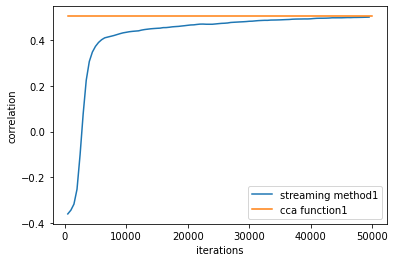

In [5]:
plt.plot(np.array(list(range(1,100)))*500,corr_list1,label='streaming method1')
plt.plot([500,50000],[np.corrcoef(X_c.T,Y_c.T)[3,0],np.corrcoef(X_c.T,Y_c.T)[3,0]],label='cca function1')
plt.xlabel('iterations')
plt.ylabel('correlation')
plt.legend()
plt.show()

In [6]:
V = np.random.randn(8,3)
V,_ = np.linalg.qr(V, mode='reduced')
U = np.random.randn(8,3)
U,_ = np.linalg.qr(U, mode='reduced')

beta = 0.0005
alpha = 0.005
corr_list1 = []
corr_list2 = []
corr_list3 = []

for j in range(99):
    for i in range(500):
        
        ind = j*500+i
        x = X[ind:ind+400,:]
        y = Y[ind:ind+400,:]
        
        c12 = x.T@y
        c11 = x.T@x
        c22 = y.T@y

        #initialize A
        A = np.zeros((8,8))
        A[:4,4:] = c12
        A[4:,:4] = c12.T
        
        #initialize B
        B = np.zeros((8,8))
        B[0:4,0:4] = c11
        B[4:8,4:8] = c22
        
        #two-step process
        U -= alpha*(B@U-A@V)
        V += beta*U
        V,r = np.linalg.qr(V, mode='reduced')
        V = V*np.sign(np.diagonal(r))#avoid switching sign in QR
    
    #compute a and b
    a = V[:4]
    a,r = np.linalg.qr(a, mode='reduced')
    a = a*np.sign(np.diagonal(r))#avoid switching sign in QR
    b = V[4:]
    b,r = np.linalg.qr(b, mode='reduced')
    b = b*np.sign(np.diagonal(r))#avoid switching sign in QR
    
    X_s = X@a
    Y_s = Y@b
    corr_list1.append(np.corrcoef(X_s.T,Y_s.T)[3,0])
    corr_list2.append(np.corrcoef(X_s.T,Y_s.T)[4,1])
    corr_list3.append(np.corrcoef(X_s.T,Y_s.T)[5,2])

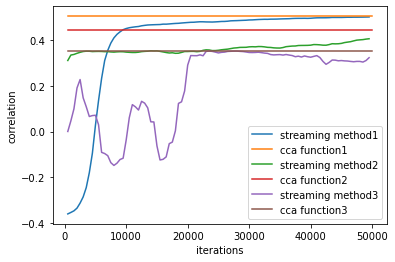

In [7]:
plt.plot(np.array(list(range(1,100)))*500,corr_list1,label='streaming method1')
plt.plot([500,50000],[np.corrcoef(X_c.T,Y_c.T)[3,0],np.corrcoef(X_c.T,Y_c.T)[3,0]],label='cca function1')
plt.plot(np.array(list(range(1,100)))*500,corr_list2,label='streaming method2')
plt.plot([500,50000],[np.corrcoef(X_c.T,Y_c.T)[4,1],np.corrcoef(X_c.T,Y_c.T)[4,1]],label='cca function2')
plt.plot(np.array(list(range(1,100)))*500,corr_list3,label='streaming method3')
plt.plot([500,50000],[np.corrcoef(X_c.T,Y_c.T)[5,2],np.corrcoef(X_c.T,Y_c.T)[5,2]],label='cca function3')
plt.xlabel('iterations')
plt.ylabel('correlation')
plt.legend()
plt.show()